In [135]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
import warnings #to remove the warnings
import random
warnings.filterwarnings('ignore')

np.random.seed(100)
random.seed(100)
def generateNewFeatureValMultiple(df, col, numberOfBins, numPatients):
    hist, bins = np.histogram(df[col], bins=numberOfBins)
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(numPatients)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return list(random_from_cdf)   


In [136]:
raw_df = pd.read_csv('../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_df.columns = cols
raw_df['Diagnosis'] = raw_df['Diagnosis'].map(
                   {2:0,4:1})

temp = []
for index, row in raw_df.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
df = pd.DataFrame(np.array(temp), columns=cols)
df['BareNuclei'] = df['BareNuclei'].astype(np.int)
print(df.shape)
print(df)


(683, 11)
          ID Thickness SizeUniformity ShapeUniformity Adhesion Size  \
0    1000025         5              1               1        1    2   
1    1002945         5              4               4        5    7   
2    1015425         3              1               1        1    2   
3    1016277         6              8               8        1    3   
4    1017023         4              1               1        3    2   
..       ...       ...            ...             ...      ...  ...   
678   776715         3              1               1        1    3   
679   841769         2              1               1        1    2   
680   888820         5             10              10        3    7   
681   897471         4              8               6        4    3   
682   897471         4              8               8        5    4   

     BareNuclei Bland Chromatin Nucleoli Mitoses Diagnosis  
0             1               3        1       1         0  
1            10

In [137]:
knnScores = []
naiveBaysScores = []
logisticRegressionScores = []
svmRegressionScores = []
decisionTreeRegressionScores = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]
    y=y.astype('int')

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T



    ''' KNN '''
    
    error = []
    score_vals = []
    for j in range(1, 20):
        knn = KNeighborsRegressor(n_neighbors=j)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        mae = mean_absolute_error(y_test, pred_i)
        error.append(mae)
        score_vals.append(knn.score(X_test, y_test))
        y_pred = knn.predict(X_test)
        y_pred = y_pred == 1
        performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    bestIndex = score_vals.index(max(score_vals)) + 1  #Adds one because it starts with 1 neighbor not 0

    regressor = KNeighborsRegressor(n_neighbors=bestIndex)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred = y_pred == 1
    #print('Iteration {}: '.format(i))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    knnScores.append(performanceAccuracy)

    '''Naive Bayes'''
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = (nb.predict(X_test))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    naiveBaysScores.append(performanceAccuracy)

    '''Logistic Regression'''

    modelLogistic = LogisticRegression()
    modelLogistic.fit(X_train,y_train)
    y_pred = modelLogistic.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    logisticRegressionScores.append(performanceAccuracy)

    '''SVM'''

    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    svmRegressionScores.append(performanceAccuracy)
    
    '''Decision Tree'''

    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    decisionTreeRegressionScores.append(performanceAccuracy)
    print('Iteration: {}'.format(i))




print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(knnScores), max(knnScores), sum(knnScores)/len(knnScores)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(naiveBaysScores), max(naiveBaysScores), sum(naiveBaysScores)/len(naiveBaysScores)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(logisticRegressionScores), max(logisticRegressionScores), sum(logisticRegressionScores)/len(logisticRegressionScores)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(svmRegressionScores), max(svmRegressionScores), sum(svmRegressionScores)/len(svmRegressionScores)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(decisionTreeRegressionScores), max(decisionTreeRegressionScores), sum(decisionTreeRegressionScores)/len(decisionTreeRegressionScores)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
KNN - Min: 0.8102189781021898, Max: 0.9416058394160584, Avg: 0.8905109489051094
NB  - Min: 0.9416058394160584, Max: 0.9781021897810219, Avg: 0.9635036496350364
LR  - Min: 0.9562043795620438, Max: 0.9854014598540146, Avg: 0.9678832116788321
SVM - Min: 0.9562043795620438, Max: 0.9854014598540146, Avg: 0.97007299270073
DT  - Min: 0.8759124087591241, Max: 0.9781021897810219, Avg: 0.94014598540146


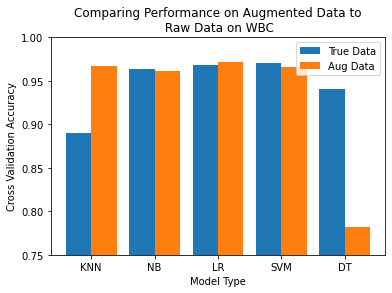

In [138]:
import matplotlib.pyplot as plt 
  
X = ['KNN','NB','LR','SVM', 'DT']

aug = [np.mean(augmentedKnnScores), np.mean(augmentedNaiveBaysScores), np.mean(augmentedLogisticRegressionScores),
        np.mean(augmentedSvmRegressionScores), np.mean(augmentedDecisionTreeRegressionScores)]
reg = [np.mean(knnScores), np.mean(naiveBaysScores), np.mean(logisticRegressionScores),
        np.mean(svmRegressionScores), np.mean(decisionTreeRegressionScores)]

Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, reg, 0.4, label = 'True Data')
plt.bar(X_axis + 0.2, aug, 0.4, label = 'Aug Data')
  
plt.xticks(X_axis, X)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0.75,1)
plt.title("Comparing Performance on Augmented Data to\n Raw Data on WBC")
plt.legend()
plt.show()

In [139]:
underknnScores = []
undernaiveBaysScores = []
underlogisticRegressionScores = []
undersvmRegressionScores = []
underdecisionTreeRegressionScores = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]
    y=y.astype('int')

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T




    trainingSet = X_train.copy()
    trainingSet['Diagnosis'] = y_train
    arr2D = trainingSet.to_numpy()
    columnIndex = -1
    sortedArr = arr2D[arr2D[:,columnIndex].argsort()]
    numZeros = list(sortedArr[:, columnIndex]).count(0)
    benignDF = pd.DataFrame(sortedArr[0:numZeros])
    malignantDF =  pd.DataFrame(sortedArr[numZeros:numZeros+20])
    result = pd.concat([benignDF, malignantDF])
    result.columns = benignDF.columns
    print(benignDF.shape)
    print(malignantDF.shape)
    print(result.shape)
    jointArray = np.vstack((beningPatients,malignangPatients))
    finalDataset = pd.DataFrame(jointArray, columns = benignDF.columns)
    for i in result:
        result[i] = result[i].astype(np.int)
    X_train = result[result.columns[:-1]]
    y_train = result[result.columns[-1]]
    print(finalDataset)

    ''' KNN '''
    
    error = []
    score_vals = []
    for j in range(1, 20):
        knn = KNeighborsRegressor(n_neighbors=j)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        mae = mean_absolute_error(y_test, pred_i)
        error.append(mae)
        score_vals.append(knn.score(X_test, y_test))
        y_pred = knn.predict(X_test)
        y_pred = y_pred == 1
        performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    bestIndex = score_vals.index(max(score_vals)) + 1  #Adds one because it starts with 1 neighbor not 0

    regressor = KNeighborsRegressor(n_neighbors=bestIndex)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred = y_pred == 1
    #print('Iteration {}: '.format(i))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underknnScores.append(performanceAccuracy)

    '''Naive Bayes'''
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = (nb.predict(X_test))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    undernaiveBaysScores.append(performanceAccuracy)

    '''Logistic Regression'''

    modelLogistic = LogisticRegression()
    modelLogistic.fit(X_train,y_train)
    y_pred = modelLogistic.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underlogisticRegressionScores.append(performanceAccuracy)

    '''SVM'''

    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    undersvmRegressionScores.append(performanceAccuracy)
    
    '''Decision Tree'''

    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underdecisionTreeRegressionScores.append(performanceAccuracy)
    print('Iteration: {}'.format(i))




print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(underknnScores), max(underknnScores), sum(underknnScores)/len(underknnScores)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(undernaiveBaysScores), max(undernaiveBaysScores), sum(undernaiveBaysScores)/len(undernaiveBaysScores)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(underlogisticRegressionScores), max(underlogisticRegressionScores), sum(underlogisticRegressionScores)/len(underlogisticRegressionScores)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(undersvmRegressionScores), max(undersvmRegressionScores), sum(undersvmRegressionScores)/len(undersvmRegressionScores)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(underdecisionTreeRegressionScores), max(underdecisionTreeRegressionScores), sum(underdecisionTreeRegressionScores)/len(underdecisionTreeRegressionScores)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


(365, 10)
(20, 10)
(385, 10)
        0     1     2     3     4     5     6     7     8    9
0    1.98  1.16  1.14  1.18  1.90  1.18  1.12  1.14  1.14  0.0
1    3.10  1.16  1.14  1.18  1.90  1.18  3.04  1.14  3.10  0.0
2    5.06  1.16  1.14  1.18  1.90  1.18  1.12  3.10  1.14  0.0
3    3.94  1.16  1.14  1.18  1.90  1.18  2.08  1.14  1.98  0.0
4    5.06  1.16  1.14  1.18  1.90  1.18  2.08  1.14  1.14  0.0
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  ...
717  5.86  2.98  5.14  5.14  4.06  9.10  6.94  1.18  9.82  1.0
718  5.14  9.10  6.94  1.18  9.82  9.82  8.02  4.06  1.18  1.0
719  9.10  9.82  1.90  2.98  4.06  2.98  9.10  2.98  1.18  1.0
720  9.10  2.98  5.86  9.82  6.94  8.02  2.98  2.98  2.98  1.0
721  2.98  8.02  9.82  9.82  2.98  9.82  6.94  2.98  9.82  1.0

[722 rows x 10 columns]
Iteration: 9
(356, 10)
(20, 10)
(376, 10)
        0     1     2     3     4     5     6     7     8    9
0    1.98  1.16  1.14  1.18  1.90  1.18  1.12  1.14  1.14  0.0
1    3.10  1.16  1.14 

In [140]:
underAugmentedKnnScores = []
underAugmentedNaiveBaysScores = []
underAugmentedLogisticRegressionScores = []
underAugmentedSvmRegressionScores = []
underAugmentedDecisionTreeRegressionScores = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    #print('X Train: {}'.format(X_train.shape))
    #print('y_train: {}'.format(y_train.shape))
    trainingSet = X_train.copy()
    trainingSet['Diagnosis'] = y_train
    arr2D = trainingSet.to_numpy()
    columnIndex = -1
    sortedArr = arr2D[arr2D[:,columnIndex].argsort()]
    numZeros = list(sortedArr[:, columnIndex]).count(0)
    benignDF, malignantDF = pd.DataFrame(sortedArr[0:numZeros]), pd.DataFrame(sortedArr[numZeros:numZeros+20])
    benignDF.columns = trainingSet.columns
    malignantDF.columns = trainingSet.columns
    benignPatients = []
    print('Benign Shape: {}'.format(benignDF.shape))
    print('Malignant Shape: {}'.format(malignantDF.shape))

    for col in benignDF.columns:
        benignPatients.append(generateNewFeatureValMultiple(benignDF, col, 25, max(benignDF.shape[0], malignantDF.shape[0])))
    beningPatients = np.array(benignPatients).T
    malignangPatients = []
    for col in malignantDF.columns:
        malignangPatients.append(generateNewFeatureValMultiple(malignantDF, col, 25, max(benignDF.shape[0], malignantDF.shape[0])))
    malignangPatients = np.array(malignangPatients).T
    print('Aug Benign Shape: {}'.format(beningPatients.shape))
    print('Aug Malignant Shape: {}'.format(malignangPatients.shape))
    jointArray = np.vstack((beningPatients,malignangPatients))
    finalDataset = pd.DataFrame(jointArray, columns = benignDF.columns)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    print(finalDataset)


    ''' KNN '''

    
    error = []
    score_vals = []
    for j in range(1, 20):
        knn = KNeighborsRegressor(n_neighbors=j)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test).round(decimals=0)
        mae = mean_absolute_error(y_test, pred_i)
        error.append(mae)
        score_vals.append(knn.score(X_test, y_test))
        y_pred = knn.predict(X_test).round(decimals=0)
        y_pred = y_pred == 1
        performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    bestIndex = score_vals.index(max(score_vals)) + 1  #Adds one because it starts with 1 neighbor not 0

    regressor = KNeighborsRegressor(n_neighbors=bestIndex)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test).round(decimals=0)
    y_pred = y_pred == 1
    #print('Iteration {}: '.format(i))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underAugmentedKnnScores.append(performanceAccuracy)

    '''Naive Bayes'''

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = (nb.predict(X_test))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underAugmentedNaiveBaysScores.append(performanceAccuracy)

    '''Logistic Regression'''

    modelLogistic = LogisticRegression()
    modelLogistic.fit(X_train,y_train)
    y_pred = modelLogistic.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underAugmentedLogisticRegressionScores.append(performanceAccuracy)

    '''SVM'''

    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underAugmentedSvmRegressionScores.append(performanceAccuracy)
    
    '''Decision Tree'''

    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underAugmentedDecisionTreeRegressionScores.append(performanceAccuracy)
    print('Iteration: {}'.format(i))




print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedKnnScores), max(underAugmentedKnnScores), sum(underAugmentedKnnScores)/len(underAugmentedKnnScores)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedNaiveBaysScores), max(underAugmentedNaiveBaysScores), sum(underAugmentedNaiveBaysScores)/len(underAugmentedNaiveBaysScores)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedLogisticRegressionScores), max(underAugmentedLogisticRegressionScores), sum(underAugmentedLogisticRegressionScores)/len(underAugmentedLogisticRegressionScores)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedSvmRegressionScores), max(underAugmentedSvmRegressionScores), sum(underAugmentedSvmRegressionScores)/len(underAugmentedSvmRegressionScores)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedDecisionTreeRegressionScores), max(underAugmentedDecisionTreeRegressionScores), sum(underAugmentedDecisionTreeRegressionScores)/len(underAugmentedDecisionTreeRegressionScores)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


Benign Shape: (365, 10)
Malignant Shape: (20, 10)
Aug Benign Shape: (365, 10)
Aug Malignant Shape: (365, 10)
     Thickness  SizeUniformity  ShapeUniformity  Adhesion  Size  BareNuclei  \
0         3.10            1.16             1.14      2.98  1.90        1.18   
1         5.06            1.16             1.14      1.18  1.90        1.18   
2         5.06            1.16             1.14      1.18  1.90        1.18   
3         1.98            1.16             1.14      1.18  1.90        1.18   
4         1.14            1.16             1.14      1.18  1.18        1.18   
..         ...             ...              ...       ...   ...         ...   
725       7.92            5.94             4.08      9.82  6.00        9.84   
726       6.00            3.14             4.08      9.82  4.08        9.84   
727       9.84            9.02             4.08      9.82  3.12        3.12   
728       9.84            3.14             9.84      8.02  5.04        2.16   
729       6.00        

In [141]:
augmentedKnnScores = []
augmentedNaiveBaysScores = []
augmentedLogisticRegressionScores = []
augmentedSvmRegressionScores = []
augmentedDecisionTreeRegressionScores = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    #print('X Train: {}'.format(X_train.shape))
    #print('y_train: {}'.format(y_train.shape))
    trainingSet = X_train.copy()
    trainingSet['Diagnosis'] = y_train
    arr2D = trainingSet.to_numpy()
    columnIndex = -1
    sortedArr = arr2D[arr2D[:,columnIndex].argsort()]
    numZeros = list(sortedArr[:, columnIndex]).count(0)
    benignDF, malignantDF = pd.DataFrame(sortedArr[0:numZeros]), pd.DataFrame(sortedArr[numZeros:])
    benignDF.columns = trainingSet.columns
    malignantDF.columns = trainingSet.columns
    benignPatients = []
    print('Benign Shape: {}'.format(benignDF.shape))
    print('Malignant Shape: {}'.format(malignantDF.shape))

    for col in benignDF.columns:
        benignPatients.append(generateNewFeatureValMultiple(benignDF, col, 25, max(benignDF.shape[0], malignantDF.shape[0])))
    beningPatients = np.array(benignPatients).T
    malignangPatients = []
    for col in malignantDF.columns:
        malignangPatients.append(generateNewFeatureValMultiple(malignantDF, col, 25, max(benignDF.shape[0], malignantDF.shape[0])))
    malignangPatients = np.array(malignangPatients).T
    print('Aug Benign Shape: {}'.format(beningPatients.shape))
    print('Aug Malignant Shape: {}'.format(malignangPatients.shape))
    jointArray = np.vstack((beningPatients,malignangPatients))
    finalDataset = pd.DataFrame(jointArray, columns = benignDF.columns)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    print(finalDataset)


    ''' KNN '''

    
    error = []
    score_vals = []
    for j in range(1, 20):
        knn = KNeighborsRegressor(n_neighbors=j)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test).round(decimals=0)
        mae = mean_absolute_error(y_test, pred_i)
        error.append(mae)
        score_vals.append(knn.score(X_test, y_test))
        y_pred = knn.predict(X_test).round(decimals=0)
        y_pred = y_pred == 1
        performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    bestIndex = score_vals.index(max(score_vals)) + 1  #Adds one because it starts with 1 neighbor not 0

    regressor = KNeighborsRegressor(n_neighbors=bestIndex)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test).round(decimals=0)
    y_pred = y_pred == 1
    #print('Iteration {}: '.format(i))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    augmentedKnnScores.append(performanceAccuracy)

    '''Naive Bayes'''

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = (nb.predict(X_test))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    augmentedNaiveBaysScores.append(performanceAccuracy)

    '''Logistic Regression'''

    modelLogistic = LogisticRegression()
    modelLogistic.fit(X_train,y_train)
    y_pred = modelLogistic.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    augmentedLogisticRegressionScores.append(performanceAccuracy)

    '''SVM'''

    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    augmentedSvmRegressionScores.append(performanceAccuracy)
    
    '''Decision Tree'''

    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    augmentedDecisionTreeRegressionScores.append(performanceAccuracy)
    print('Iteration: {}'.format(i))




print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(augmentedKnnScores), max(augmentedKnnScores), sum(augmentedKnnScores)/len(augmentedKnnScores)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(augmentedNaiveBaysScores), max(augmentedNaiveBaysScores), sum(augmentedNaiveBaysScores)/len(augmentedNaiveBaysScores)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(augmentedLogisticRegressionScores), max(augmentedLogisticRegressionScores), sum(augmentedLogisticRegressionScores)/len(augmentedLogisticRegressionScores)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(augmentedSvmRegressionScores), max(augmentedSvmRegressionScores), sum(augmentedSvmRegressionScores)/len(augmentedSvmRegressionScores)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(augmentedDecisionTreeRegressionScores), max(augmentedDecisionTreeRegressionScores), sum(augmentedDecisionTreeRegressionScores)/len(augmentedDecisionTreeRegressionScores)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


Benign Shape: (365, 10)
Malignant Shape: (181, 10)
Aug Benign Shape: (365, 10)
Aug Malignant Shape: (365, 10)
     Thickness  SizeUniformity  ShapeUniformity  Adhesion  Size  BareNuclei  \
0         3.94            1.16             1.14      1.18  1.90        1.18   
1         1.14            1.16             1.14      1.18  1.90        5.14   
2         3.10            1.16             1.14      1.18  1.90        1.18   
3         1.14            1.16             1.14      1.18  2.98        1.18   
4         5.06            1.16             1.14      2.98  1.90        1.18   
..         ...             ...              ...       ...   ...         ...   
725       5.14            8.02             5.14      8.02  8.02        1.18   
726       5.86            8.02             5.14      5.86  2.98        9.82   
727       9.82            9.82             9.82      4.06  9.82        8.02   
728       5.14            9.82             4.06      5.14  9.82        9.10   
729       5.14       

KNN - Min: 0.9343065693430657, Max: 0.9927007299270073, Avg: 0.9620437956204378
NB  - Min: 0.9343065693430657, Max: 0.9781021897810219, Avg: 0.9613138686131387
LR  - Min: 0.9562043795620438, Max: 0.9781021897810219, Avg: 0.9693430656934308
SVM - Min: 0.9416058394160584, Max: 0.9781021897810219, Avg: 0.9649635036496351
DT  - Min: 0.7518248175182481, Max: 0.8759124087591241, Avg: 0.8043795620437957


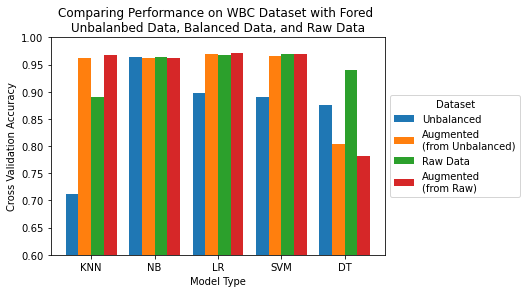

In [142]:
import matplotlib.pyplot as plt 
  
X = ['KNN','NB','LR','SVM', 'DT']




print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedKnnScores), max(underAugmentedKnnScores), sum(underAugmentedKnnScores)/len(underAugmentedKnnScores)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedNaiveBaysScores), max(underAugmentedNaiveBaysScores), sum(underAugmentedNaiveBaysScores)/len(underAugmentedNaiveBaysScores)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedLogisticRegressionScores), max(underAugmentedLogisticRegressionScores), sum(underAugmentedLogisticRegressionScores)/len(underAugmentedLogisticRegressionScores)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedSvmRegressionScores), max(underAugmentedSvmRegressionScores), sum(underAugmentedSvmRegressionScores)/len(underAugmentedSvmRegressionScores)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedDecisionTreeRegressionScores), max(underAugmentedDecisionTreeRegressionScores), sum(underAugmentedDecisionTreeRegressionScores)/len(underAugmentedDecisionTreeRegressionScores)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


undersampled = [np.mean(underknnScores), np.mean(undernaiveBaysScores), np.mean(underlogisticRegressionScores),
        np.mean(undersvmRegressionScores), np.mean(underdecisionTreeRegressionScores)]
underAug = [np.mean(underAugmentedKnnScores), np.mean(underAugmentedNaiveBaysScores), np.mean(underAugmentedLogisticRegressionScores),
        np.mean(underAugmentedSvmRegressionScores), np.mean(underAugmentedDecisionTreeRegressionScores)]
raw = [np.mean(knnScores), np.mean(naiveBaysScores), np.mean(logisticRegressionScores),
        np.mean(svmRegressionScores), np.mean(decisionTreeRegressionScores)]
rawAug = [np.mean(augmentedKnnScores), np.mean(augmentedNaiveBaysScores), np.mean(augmentedLogisticRegressionScores),
        np.mean(augmentedSvmRegressionScores), np.mean(augmentedDecisionTreeRegressionScores)]


Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, undersampled, 0.2, label = 'Unbalanced')
plt.bar(X_axis - 0.1, underAug, 0.2, label = 'Augmented\n(from Unbalanced)')
plt.bar(X_axis + 0.1, raw, 0.2, label = 'Raw Data')
plt.bar(X_axis + 0.3, rawAug, 0.2, label = 'Augmented\n(from Raw)')
  
plt.xticks(X_axis, X)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0.6,1)
plt.title("Comparing Performance on WBC Dataset with Fored \nUnbalanbed Data, Balanced Data, and Raw Data")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()